## Pymaceuticals Analysis

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


In [117]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [118]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combine_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combine_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [119]:
mice_count = combine_mouse_data['Mouse ID'].nunique()
mice_count

249

In [120]:
duplicate_mice = combine_mouse_data[combine_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [121]:
clean_combine_mouse_data = combine_mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_combine_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [122]:
clean_mice_count = clean_combine_mouse_data['Mouse ID'].nunique()
clean_mice_count

249

## Summary Statistics

In [123]:
mean = clean_combine_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [124]:
median = clean_combine_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [125]:
variance = clean_combine_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [126]:
std_dev = clean_combine_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.637293
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [127]:
sem = std_dev / (clean_mice_count**0.5)
sem

Drug Regimen
Capomulin    0.316531
Ceftamin     0.397230
Infubinol    0.416182
Ketapril     0.524705
Naftisol     0.515516
Placebo      0.495636
Propriva     0.420621
Ramicane     0.307122
Stelasyn     0.488628
Zoniferol    0.441490
Name: Tumor Volume (mm3), dtype: float64

In [128]:
summary_statistics = pd.DataFrame ({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Dev.': std_dev,
    'SEM': sem})
summary_statistics

,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.316531
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.397230
Infubinol,52.884795,51.820584,43.128684,6.567243,0.416182
Ketapril,55.235638,53.698743,68.553577,8.279709,0.524705
Naftisol,54.331565,52.509285,66.173479,8.134708,0.515516
Placebo,54.033581,52.288934,61.168083,7.821003,0.495636
Propriva,52.458254,50.854632,44.053659,6.637293,0.420621
Ramicane,40.216745,40.673236,23.486704,4.846308,0.307122
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.488628


In [129]:
summary_stats= clean_combine_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', 
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: x.std() / (len(x)**0.5)).reset_index()
summary_stats

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Chart

In [130]:
timepoints_count = clean_combine_mouse_data.groupby("Drug Regimen")["Timepoint"].count()
timepoints_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

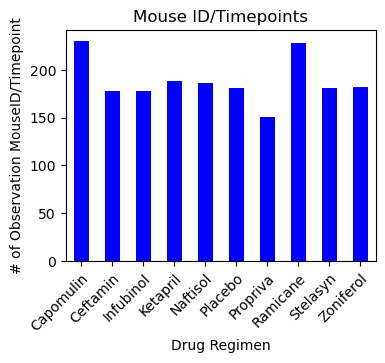

In [131]:
mouseid_timepoints = timepoints_count.plot(kind="bar", facecolor="blue", figsize=(4,3),
                                            title="Mouse ID/Timepoints",
                                            xlabel="Drug Regimen",
                                            ylabel="# of Observation MouseID/Timepoint")
xticklabels = timepoints_count.index
mouseid_timepoints.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

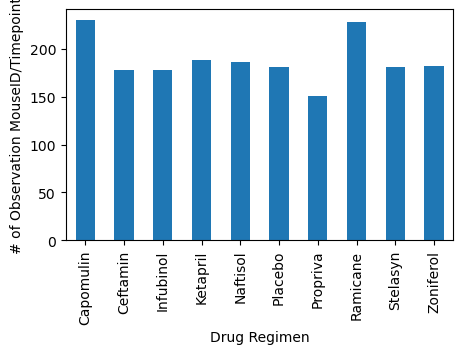

In [132]:
timepoints_count = timepoints_count.plot(kind="bar", figsize=(5,3))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observation MouseID/Timepoint")

plt.show

In [133]:
unique_mice = clean_combine_mouse_data["Sex"].value_counts()
unique_mice

Sex
Male      958
Female    925
Name: count, dtype: int64

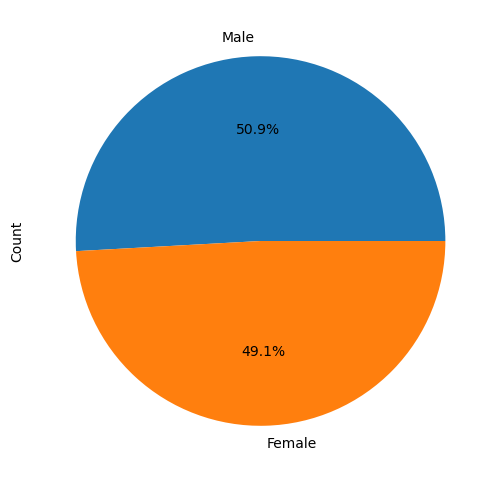

In [134]:
unique_mice.plot(kind="pie", autopct='%1.1f%%', ylabel='Count', figsize=(6,6))
plt.show()

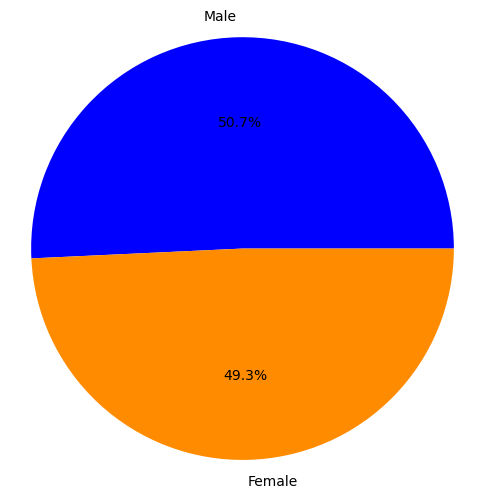

In [135]:
labels = ["Male", "Female"]
sizes = [958, 930]
colors = ["blue", "darkorange"]


plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)

plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [136]:
#last_time_point= clean_combine_mouse_data.groupby('Mouse ID').last().reset_index()
#last_time_point

In [137]:
last_time_point= clean_combine_mouse_data.groupby('Mouse ID')['Timepoint'].max()
last_time_point

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [138]:
combine_clean_data = pd.merge(clean_combine_mouse_data, last_time_point, on=['Mouse ID'])
combine_clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2,45
1879,z969,Naftisol,Male,9,30,30,65.841013,3,45
1880,z969,Naftisol,Male,9,30,35,69.176246,4,45
1881,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [139]:
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []


for treatment in treatment_names:
    treatment_data = combine_clean_data[combine_clean_data['Drug Regimen'] ==treatment]['Tumor Volume (mm3)']
    tumor_volume_data.append(treatment_data)

    quartiles_data = treatment_data.quantile([.25,.50,.75])
    lowerq = quartiles_data[0.25]
    upperq = quartiles_data[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

print(f'Values below {lower_bound} could be outliers.')
print(f'Values below {upper_bound} could be outliers.')

Values below 32.81891142624998 could be outliers.
Values below 71.19095325625001 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x29df772cf70>,
 'caps': [<matplotlib.lines.Line2D at 0x29df772f490>,
 'boxes': [<matplotlib.lines.Line2D at 0x29df772f8b0>,
 'medians': [<matplotlib.lines.Line2D at 0x29df772c4c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x29df772c040>,
 'means': []}

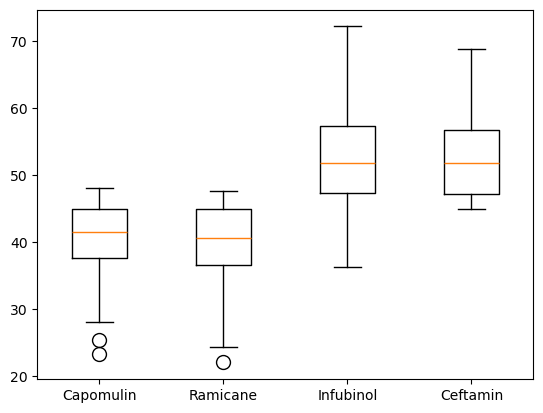

In [140]:
plt.boxplot(tumor_volume_data, tick_labels=treatment_names, flierprops=dict(marker='o', color='red', markersize=10))


In [141]:
capomulin_data =  clean_combine_mouse_data[clean_combine_mouse_data["Drug Regimen"] == "Capomulin"]
mouse_id = "s185"


mouse_data = clean_combine_mouse_data[clean_combine_mouse_data["Mouse ID"] == "s185"]
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


## Line and Scatter Plot

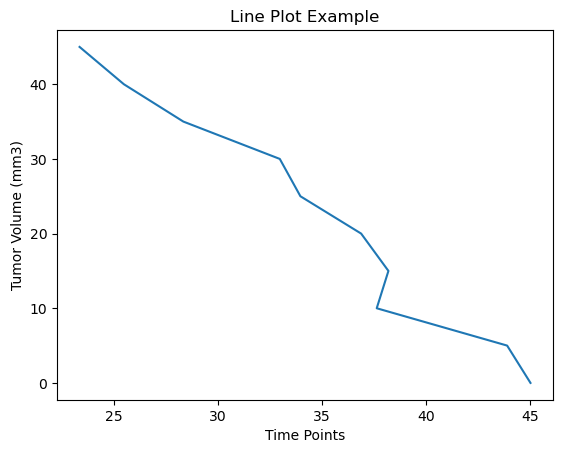

In [142]:
plt.plot(mouse_data['Tumor Volume (mm3)'], mouse_data['Timepoint'])
plt.title('Line Plot Example')
plt.xlabel('Time Points')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

In [143]:
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

scatterplt_data = pd.merge(average_tumor_volume, capomulin_data, on='Mouse ID') 
scatterplt_data

,Mouse ID,Tumor Volume (mm3)_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_y,Metastatic Sites
0,b128,41.963636,Capomulin,Female,9,22,0,45.000000,0
1,b128,41.963636,Capomulin,Female,9,22,5,45.651331,0
2,b128,41.963636,Capomulin,Female,9,22,10,43.270852,0
3,b128,41.963636,Capomulin,Female,9,22,15,43.784893,0
4,b128,41.963636,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...,...
225,y793,38.506829,Capomulin,Male,17,17,25,38.992734,2
226,y793,38.506829,Capomulin,Male,17,17,30,35.726023,2
227,y793,38.506829,Capomulin,Male,17,17,35,36.327870,2
228,y793,38.506829,Capomulin,Male,17,17,40,31.475411,2


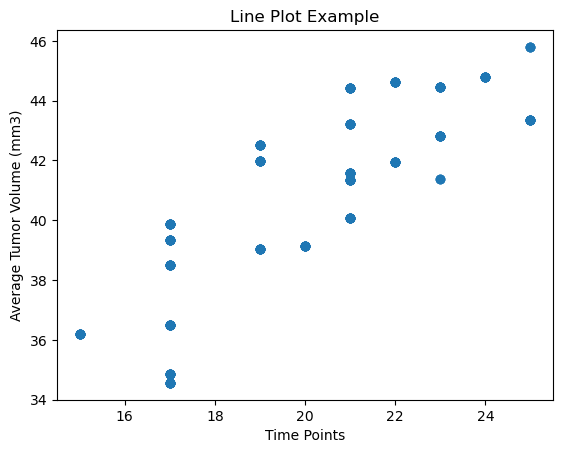

In [144]:


plt.scatter(scatterplt_data['Weight (g)'], scatterplt_data['Tumor Volume (mm3)_x'])
plt.title('Line Plot Example')
plt.xlabel('Time Points')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

## Correlation and Regression

In [145]:
weight = scatterplt_data['Weight (g)']
volume = scatterplt_data['Tumor Volume (mm3)_x']
correlation = st.pearsonr(weight, volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.83


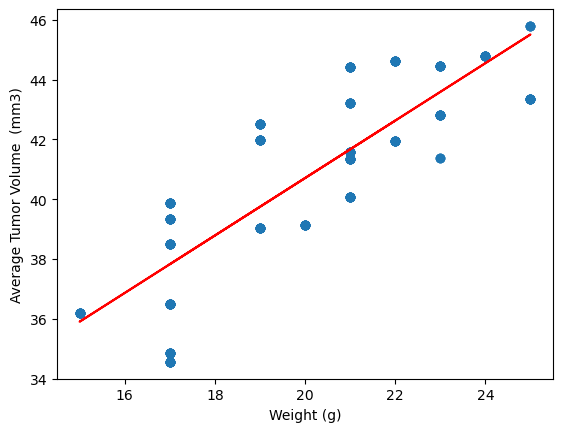

In [149]:
x_values = scatterplt_data['Weight (g)']
y_values = scatterplt_data['Tumor Volume (mm3)_x']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume  (mm3)')
plt.show()